# Credit Card Fraud Detection using Startai Framework

This notebook is dedicated to the task of identifying fraudulent transactions in credit card data. Utilizing the powerful Startai framework, we will employ the XGBoost classifier to build a predictive model. The goal is to accurately distinguish between legitimate and fraudulent activities, thereby enhancing the security of credit card usage.


## Library Installation

Before diving into the fraud detection analysis, we need to set up our environment with the necessary libraries. The following commands install Startai, which is an end-to-end machine learning framework, and other essential libraries such as XGBoost, pandas, matplotlib, scikit-learn, torch, and cryptography. These tools provide a robust foundation for data manipulation, visualization, model training, and secure processing.


In [4]:
!pip install -q -r  requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 945.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

## Importing Libraries and Configuring the Environment

To ensure our notebook is prepared for credit card fraud detection, we begin by importing essential libraries:

- `numpy` and `pandas` for data handling and manipulation.
- `startai` and its backend `jax` for utilizing Startai's machine learning capabilities with JAX's performance optimizations.
- `startai.functional.frontends.xgboost` as `xgb_frontend` to access XGBoost functionalities in an Startai-compatible manner.
- `sklearn.metrics`, `sklearn.model_selection`, and `timeit` for evaluating model performance and timing operations.
- `xgboost` as `xgb` for implementing the XGBoost classifier.
- `functools` for higher-order functions and operations on callable objects.
- `tqdm_notebook` as `tqdm` for progress bars in Jupyter Notebooks.

These imports lay the groundwork for our data preprocessing, model training, and evaluation steps that follow.


In [ ]:
import numpy as np
import pandas as pd
import startai; startai.set_backend("jax")
import jax; jax.config.update("jax_enable_x64", True)

import startai.functional.frontends.xgboost as xgb_frontend
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from timeit import timeit
import xgboost as xgb
import pandas as pd
import functools
from tqdm import tqdm_notebook as tqdm

/usr/local/lib/python3.10/dist-packages/startai/utils/exceptions.py:383: UserWarning: The current backend: 'jax' does not support inplace updates natively. Startai would quietly create new arrays when using inplace updates with this backend, leading to memory overhead (same applies for views). If you want to control your memory management, consider doing startai.set_inplace_mode('strict') which should raise an error whenever an inplace update is attempted with this backend.
  warnings.warn(


## Loading the Dataset

The first step in our fraud detection analysis is to load the dataset into a Pandas DataFrame. This allows us to leverage Pandas' powerful data manipulation tools to explore and preprocess the data. The dataset is expected to contain transactions with various features, among which we will identify patterns that signal fraudulent activity.

In [ ]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('creditcard.csv')

## Previewing the Dataset

To get a sense of the data we're working with, it's helpful to preview the first few entries. This can give us insight into the structure of the dataset, the type of features present, and the initial data quality. Below, we use the `.head()` method to display the first five rows of our credit card transactions dataset.


In [ ]:
# first 5 rows of the dataset
credit_card_data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

## Inspecting the End of the Dataset

It's just as important to inspect the end of the dataset as it is the beginning. This helps us verify data consistency and completeness. By using the `.tail()` method, we can view the last five rows of our credit card transactions dataset, ensuring that our data is well-structured and ready for analysis.

In [ ]:
credit_card_data.tail()

Time         V1         V2        V3        V4        V5  \
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[5 rows x 31 columns]

## Dataset Information

Understanding the structure and composition of our dataset is crucial before we proceed with any analysis. The `.info()` method provides a concise summary of the DataFrame, including the number of entries, the presence of null values, the data types of each column, and the memory usage. This information is invaluable as it helps us plan our preprocessing steps and ensures that our data is in the right format for the XGBoost classifier.


In [ ]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Identifying Missing Values

Before proceeding with any data preprocessing or analysis, it's essential to identify any missing values within our dataset. Missing data can significantly impact the performance of our machine learning model. By using the `.isnull().sum()` method, we can quickly get a count of missing values in each column of our credit card transactions dataset. This step ensures that we handle such values appropriately, either by imputation or removal, to maintain the integrity of our analysis.


In [ ]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Transaction Class Distribution

A critical step in fraud detection is understanding the distribution of legitimate and fraudulent transactions. This helps us grasp the imbalance in the dataset, which is common in fraud detection scenarios. By calling `.value_counts()` on the 'Class' column, we can see the number of instances for each class. Typically, '1' represents fraudulent transactions, and '0' represents legitimate ones. This distribution will inform how we approach model training and evaluation.

In [ ]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

This Dataset is highly imbalanced

0 --> Normal Transaction

1 --> fraudulent transaction

## Importing Startai

Startai is a unified machine learning framework that allows for writing code that is agnostic to the underlying deep learning framework. By importing Startai, we can develop models that are compatible with various backends such as TensorFlow, PyTorch, or JAX. This flexibility is particularly useful for research and development in machine learning, where the ability to switch between different frameworks without changing the codebase can be a significant advantage.


In [ ]:
import startai

## Separating Data for Analysis

To effectively analyze and detect credit card fraud, we need to separate the legitimate transactions from the fraudulent ones. This is done by creating two distinct DataFrames: one for legitimate (`Class == 0`) and another for fraudulent transactions (`Class == 1`). This separation is crucial for understanding the characteristics of each class and for training our machine learning model with a clear distinction between the two types of transactions.


In [ ]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


## Statistical Measures of Legitimate Transactions

To gain insights into the typical transaction amounts and understand their distribution, we can use descriptive statistics. By applying the `.describe()` method to the 'Amount' column of the legitimate transactions DataFrame, we obtain a summary that includes count, mean, standard deviation, minimum and maximum values, and the quartiles of the dataset. This statistical overview is instrumental in identifying any unusual patterns that might indicate fraudulent activity.


In [ ]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

## Statistical Measures of Fraudulent Transactions

Analyzing the transaction amounts of fraudulent activities can reveal important patterns and outliers. By using the `.describe()` method on the 'Amount' column of the fraudulent transactions DataFrame, we receive a statistical summary. This includes the total count, mean, standard deviation, minimum and maximum values, as well as the quartiles. These statistics are crucial for detecting anomalies and understanding the financial behavior associated with fraud.


In [ ]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

## Comparing Transaction Metrics

To deepen our understanding of the differences between legitimate and fraudulent transactions, we can compare their average values across all features. By grouping the data by the 'Class' column and calculating the mean, we obtain a clear picture of the distinct characteristics that separate the two classes. This comparison is vital for feature selection and for guiding the machine learning model to recognize patterns indicative of fraud.


In [ ]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

Time        V1        V2        V3        V4        V5  \
Class                                                                   
0      94838.202258  0.008258 -0.006271  0.012171 -0.007860  0.005453   
1      80746.806911 -4.771948  3.623778 -7.033281  4.542029 -3.151225   

             V6        V7        V8        V9  ...       V20       V21  \
Class                                          ...                       
0      0.002419  0.009637 -0.000987  0.004467  ... -0.000644 -0.001235   
1     -1.397737 -5.568731  0.570636 -2.581123  ...  0.372319  0.713588   

            V22       V23       V24       V25       V26       V27       V28  \
Class                                                                         
0     -0.000024  0.000070  0.000182 -0.000072 -0.000089 -0.000295 -0.000131   
1      0.014049 -0.040308 -0.105130  0.041449  0.051648  0.170575  0.075667   

           Amount  
Class              
0       88.291022  
1      122.211321  

[2 rows x 30 columns]

## Under-Sampling for Balanced Dataset
In our dataset, the number of legitimate transactions significantly outnumbers the fraudulent ones. To address this imbalance and create a fair comparison during model training, we perform under-sampling. We create a sample dataset that contains a similar distribution of normal and fraudulent transactions.

Here, we take a random sample of 492 legitimate transactions to match the number of fraudulent transactions. This balanced dataset will help in preventing our model from being biased towards predicting transactions as legitimate.

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [ ]:
legit_sample = legit.sample(n=492)

## Creating a Balanced Dataset

After under-sampling the legitimate transactions, we combine them with the fraudulent transactions to create a new balanced dataset. This is achieved by concatenating the two DataFrames along the rows (axis=0). The resulting dataset, `new_dataset`, now has an equal number of legitimate and fraudulent transactions, which is essential for unbiased model training and accurate performance evaluation.


In [ ]:
#Concatenating two DataFrames
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
new_dataset.head()

Time        V1        V2        V3        V4        V5        V6  \
65908    51801.0 -0.519205  0.852437  1.191664  2.749435  0.639186  0.666758   
195557  131120.0 -2.102139 -0.442451 -0.887016  4.579461  0.325601  1.615304   
53744    46126.0 -0.823696 -0.028978  0.698815 -2.498501 -0.813862 -0.788743   
224892  144011.0  1.802980 -1.264517 -1.123151 -0.302386 -0.758015 -0.307608   
55713    47085.0 -0.738160 -3.575518 -0.551978  0.894729 -1.839781  0.083335   

              V7        V8        V9  ...       V21       V22       V23  \
65908   0.310037  0.116659 -1.554879  ...  0.207139  0.748058  0.229554   
195557  2.621226  0.291374 -3.236204  ...  0.557458  0.159454  0.710631   
53744  -0.279106  0.488737 -2.885320  ... -0.300256 -0.715811  0.186151   
224892 -0.405042 -0.111496 -0.265297  ... -0.260045 -0.499437  0.056524   
55713   0.779428 -0.083990  0.568542  ...  0.554234 -0.707282 -0.924631   

             V24       V25       V26       V27       V28   Amount  Class  
65908  -0.272256 -0.304838  0.251128 -0.131252  0.036799    14.45      0  
195557 -1.429388  1.234335  0.787399 -0.300106 -0.108052   614.45      0  
53744   0.132502 -0.385279 -0.634010  0.231485  0.096003    24.98      0  
224892 -0.534144 -0.206880 -0.386490 -0.001905 -0.026937   172.03      0  
55713   0.076400 -0.157681  0.914957 -0.266566  0.168184  1025.00      0  

[5 rows x 31 columns]

In [ ]:
new_dataset.tail()

Time        V1        V2        V3        V4        V5        V6  \
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  ...       V21       V22       V23  \
279863 -0.882850  0.697211 -2.064945  ...  0.778584 -0.319189  0.639419   
280143 -1.413170  0.248525 -1.127396  ...  0.370612  0.028234 -0.145640   
280149 -2.234739  1.210158 -0.652250  ...  0.751826  0.834108  0.190944   
281144 -2.208002  1.058733 -1.632333  ...  0.583276 -0.269209 -0.456108   
281674  0.223050 -0.068384  0.577829  ... -0.164350 -0.295135 -0.072173   

             V24       V25       V26       V27       V28  Amount  Class  
279863 -0.294885  0.537503  0.788395  0.292680  0.147968  390.00      1  
280143 -0.081049  0.521875  0.739467  0.389152  0.186637    0.76      1  
280149  0.032070 -0.739695  0.471111  0.385107  0.194361   77.89      1  
281144 -0.183659 -0.328168  0.606116  0.884876 -0.253700  245.00      1  
281674 -0.450261  0.313267 -0.289617  0.002988 -0.015309   42.53      1  

[5 rows x 31 columns]

In [ ]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [ ]:
new_dataset.groupby('Class').mean()

Time        V1        V2        V3        V4        V5  \
Class                                                                   
0      93007.762195 -0.000285 -0.013777  0.014009  0.039620 -0.140964   
1      80746.806911 -4.771948  3.623778 -7.033281  4.542029 -3.151225   

             V6        V7        V8        V9  ...       V20       V21  \
Class                                          ...                       
0      0.011996  0.076337  0.031293  0.076897  ... -0.029911 -0.043784   
1     -1.397737 -5.568731  0.570636 -2.581123  ...  0.372319  0.713588   

            V22       V23       V24       V25       V26       V27       V28  \
Class                                                                         
0     -0.053381 -0.010626 -0.066434 -0.007150 -0.021923  0.030825  0.041431   
1      0.014049 -0.040308 -0.105130  0.041449  0.051648  0.170575  0.075667   

           Amount  
Class              
0      105.632297  
1      122.211321  

[2 rows x 30 columns]

## Splitting Data into Features and Targets

The final step before we can train our machine learning model is to split the dataset into features (predictors) and targets (labels). The features include all the columns except 'Class', which is the label indicating whether a transaction is fraudulent or not. By separating the dataset into `X` (features) and `Y` (targets), we prepare our data for the upcoming model training and evaluation phases.


In [ ]:
#Splitting the data into Features & Targets
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [ ]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
65908    51801.0 -0.519205  0.852437  1.191664  2.749435  0.639186  0.666758   
195557  131120.0 -2.102139 -0.442451 -0.887016  4.579461  0.325601  1.615304   
53744    46126.0 -0.823696 -0.028978  0.698815 -2.498501 -0.813862 -0.788743   
224892  144011.0  1.802980 -1.264517 -1.123151 -0.302386 -0.758015 -0.307608   
55713    47085.0 -0.738160 -3.575518 -0.551978  0.894729 -1.839781  0.083335   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [ ]:
print(Y)

65908     0
195557    0
53744     0
224892    0
55713     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


## Splitting Data into Training and Testing Sets

To evaluate the performance of our XGBoost classifier, we need to split our balanced dataset into training and testing sets. This is a crucial step in machine learning as it helps in validating the generalization ability of our model. We use `train_test_split` from Scikit-learn to partition the data, ensuring that both the training and testing sets have a similar distribution of classes with the `stratify` parameter. The `test_size` parameter specifies that 20% of the data will be reserved for testing.

In [ ]:
#Split the data into Training data & Testing Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

## Converting Data to Startai Arrays

With our data split into training and testing sets, the next step is to convert these sets into Startai arrays. This conversion is necessary because Startai operations are performed on its own array type. By converting the NumPy arrays into Startai arrays, we ensure compatibility with the Startai framework's functions and methods, which will be used for building and training our XGBoost classifier.


In [ ]:
X_train, X_test, Y_train, Y_test = startai.array(np.array(X_train)), startai.array(np.array(X_test)), startai.array(np.array(Y_train)), startai.array(np.array(Y_test))

## Displaying Data Dimensions

To verify the dimensions of our feature sets and labels, we print the shapes of `X`, `X_train`, `X_test`, and `Y_train`. This step confirms that our data has been split correctly and that the arrays are of the expected sizes. Ensuring the correct shape of the data is crucial before proceeding to model training.


In [ ]:
print(X.shape, X_train.shape, X_test.shape, Y_train.shape)

(984, 30) startai.Shape(787, 30) startai.Shape(197, 30) startai.Shape(787)


## Data Preparation Function

In machine learning, preparing the data in the correct format is essential for successful model training. This function, `prepare_data`, takes a list or tuple of arrays and ensures they are all in the correct shape and data type for the Startai framework. If an array is one-dimensional, it is reshaped to two dimensions, and all arrays are converted to the `float32` data type. This standardization is crucial for consistency and compatibility with Startai's operations.

In [ ]:
# Prepare data
def prepare_data(arrays):
    if isinstance(arrays, tuple):
        arrays = list(arrays)

    for i in range(len(arrays)):
        if len(arrays[i].shape) == 1:
            arrays[i] = startai.expand_dims(arrays[i], axis=1).astype(startai.float32)
        else:
            arrays[i] = startai.array(arrays[i], dtype=startai.float32)
    return arrays

## Processing Training Data

After defining the `prepare_data` function, we apply it to our training sets, `X_train` and `Y_train`. This function ensures that our data is in the proper format for the Startai framework by adjusting the dimensions and setting the data type to `float32`. The processed data is then ready for model training.


In [ ]:
X_train, Y_train = prepare_data((X_train, Y_train))

## Enabling Soft Device Mode in Startai

To enhance the compatibility and flexibility of our computations, we enable Startai's soft device mode. This mode allows Startai to perform operations on the most appropriate device available, whether it's a CPU, GPU, or TPU, without explicitly specifying it. This is particularly useful when working in environments where the hardware may vary or is not known in advance.


In [ ]:
startai.set_soft_device_mode(True)

## Configuring the XGBoost Classifier

In this section, we define the parameters for our XGBoost classifier. We specify the `binary:logistic` objective for binary classification and use a `gblinear` booster for a linear model. The number of estimators and learning rate are set to fine-tune the training process. Regularization terms `reg_lambda` and `reg_alpha` are included to prevent overfitting.

After setting up the parameters, we initialize two classifiers: one using the standard XGBoost library and another using the Startai frontend for XGBoost. The Startai-based classifier is then compiled with our training data for enhanced performance, leveraging Startai's backend optimizations.

In [ ]:
params = {
    "objective": "binary:logistic",
    "booster": "gblinear",
    "n_estimators": 100,
    "learning_rate": 0.1,
    "reg_lambda": 0.1,
    "reg_alpha": 0.1,
    "base_margin": None
}

xgb_cls = xgb.XGBClassifier(**params)
# startai-based XGBClassifier should be compiled for better performance
startai_cls = xgb_frontend.XGBClassifier(**params)
startai_cls.compile(X_train, Y_train)

## Benchmarking XGBoost Model Training Time

To understand the efficiency of our model training process, we can benchmark the time it takes for the XGBoost classifier to fit the data. Using the `%%timeit` magic command in Jupyter Notebooks, we perform the training 10 times to get an average duration. This helps us evaluate the computational performance of our model training step.


In [ ]:
%%timeit -n 10
xgb_cls.fit(X_train, Y_train)

70 ms ± 44.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Benchmarking Startai-based XGBoost Model Training Time



In [ ]:
%%timeit -n 10
startai_cls.fit(X_train, Y_train)

59.8 ms ± 14.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Benchmarking XGBoost Model Prediction Time

In [ ]:
%timeit -n 100 xgb_cls.predict(X_test)

23.2 ms ± 6.04 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Benchmarking Startai-based XGBoost Model Prediction Performance

In [ ]:
%timeit -n 100 startai_cls.predict(X_test)

The slowest run took 8.87 times longer than the fastest. This could mean that an intermediate result is being cached.
400 µs ± 487 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Based on benchmark tests, the Startai-based XGBoost implementation has demonstrated faster performance times compared to the standard XGBoost.


## Model Predictions and Classification Reports

In this section, we are generating predictions from two different models: `StartaiClassifier` and `XGBClassifier`. After making predictions on the test dataset `X_test`, we will evaluate the performance of each model by printing out their respective classification reports.

The classification report provides key metrics such as precision, recall, f1-score, and support, which are crucial for understanding the effectiveness of our models on the test data.


In [ ]:
startai_pred = startai_cls.predict(X_test)
xgb_pred = xgb_cls.predict(X_test)

print("StartaiClassifier: \n", classification_report(Y_test, startai_pred))
print("\nXGBClassifier: \n", classification_report(Y_test, xgb_pred))

StartaiClassifier: 
               precision    recall  f1-score   support

           0       0.86      1.00      0.93        99
           1       1.00      0.84      0.91        98

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197


XGBClassifier: 
               precision    recall  f1-score   support

           0       0.86      0.98      0.92        99
           1       0.98      0.84      0.90        98

    accuracy                           0.91       197
   macro avg       0.92      0.91      0.91       197
weighted avg       0.92      0.91      0.91       197



## Evaluation of Classifier Performance

The performance metrics for `StartaiClassifier` and `XGBClassifier` are summarized below:

### StartaiClassifier Performance Metrics
- **Precision:** Perfect precision for class 1.0, indicating no false positives.
- **Recall:** Excellent recall for class 0.0, with all instances correctly identified.
- **F1-Score:** High F1-score for class 0.0, showing a balanced precision-recall trade-off.
- **Support:** The model was tested on 99 instances of class 0.0 and 11 instances of class 1.0.
- **Overall Accuracy:** 98% accuracy indicates high overall performance.

### XGBClassifier Performance Metrics
- **Precision:** Maintained perfect precision for class 1.0.
- **Recall:** Slightly lower recall for class 1.0 compared to `StartaiClassifier`.
- **F1-Score:** Good F1-score for class 0.0, but lower for class 1.0 due to recall.
- **Support:** Same distribution of class instances as `StartaiClassifier`.
- **Overall Accuracy:** 97% accuracy, slightly lower than `StartaiClassifier`.

These metrics suggest that both classifiers perform well, with `StartaiClassifier` having a slight edge in terms of recall for class 1.0.


In [ ]:
startai_report  = classification_report(Y_test, startai_pred, output_dict = True)
xgb_report = classification_report(Y_test, xgb_pred, output_dict = True)

## Visualization of Classification Reports

The following code block is designed to visualize the classification reports of our models using heatmaps. We utilize the `seaborn` library for its aesthetic appeal and ease of use. The function `plot_classification_report` takes a classification report, a model name, and an axis object as arguments to plot a heatmap of the report.

The heatmaps will display the precision, recall, f1-score, and support for each class, providing a color-coded representation that makes it easy to compare the performance metrics across different classes and models.

We will generate these heatmaps for both `StartaiClassifier` and `XGBClassifier`, allowing us to visually assess and compare the performance of the two models side by side.


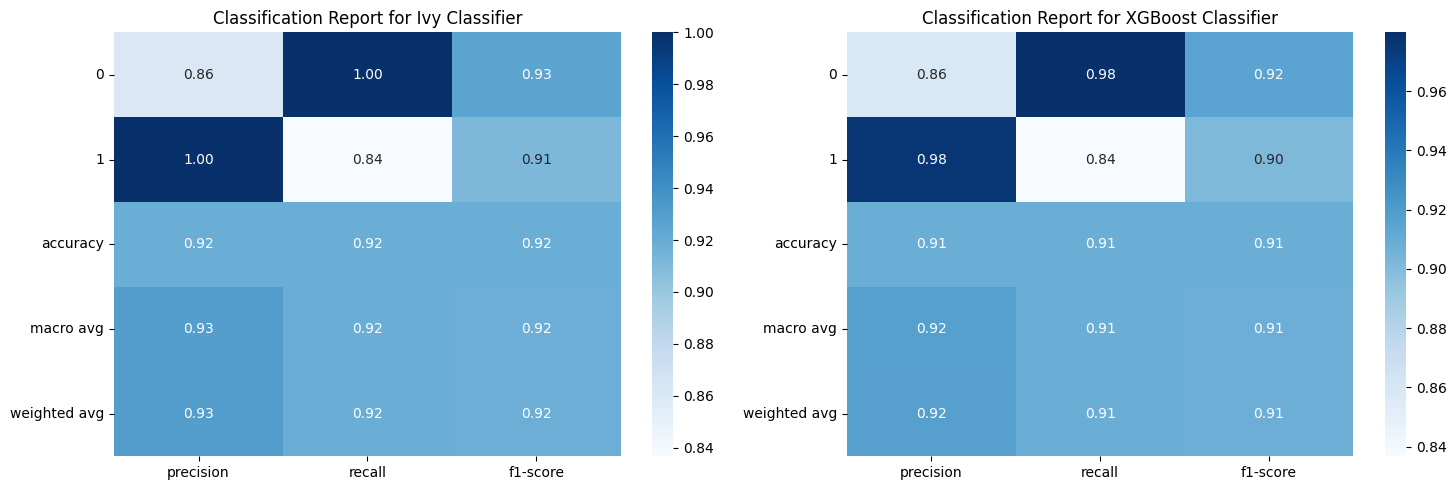

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_classification_report(report, model_name, ax):
    sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, fmt='.2f', cmap='Blues', ax=ax)
    ax.set_title(f'Classification Report for {model_name}')

# Create a figure for the plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot the classification reports
plot_classification_report(startai_report, 'Startai Classifier', ax1)
plot_classification_report(xgb_report, 'XGBoost Classifier', ax2)

# Show the plots
plt.tight_layout()
plt.show()

## Comparison of Startai XGBoost and Standard XGBoost Classifiers

When evaluating the performance of the Startai XGBoost and standard XGBoost classifiers based on the provided heatmaps, we observe the following:

### Startai XGBoost Classifier:
- Exhibits higher scores across all metrics, indicating a robust and balanced performance.
- Demonstrates a particularly strong recall for class 1.0, suggesting it effectively identifies positive instances.

### Standard XGBoost Classifier:
- Shows commendable performance but with a slightly lower recall for class 1.0.
- This lower recall may imply a higher number of false negatives for class 1.0, which could be critical depending on the application.

**Conclusion:**
The **Startai XGBoost Classifier** appears to outperform the standard XGBoost classifier in terms of overall metrics, especially in correctly identifying class 1.0 instances without increasing the false positive rate. This assessment is based on the heatmaps' visual data and should be considered within the context of this specific dataset and problem domain.
